In [1]:
import bilby
import matplotlib.pyplot as plt 
from bilby.core.prior import ConditionalLogUniform, LogUniform, TruncatedGaussian,LogNormal,ConditionalUniform
from bilby.core.prior import PriorDict, Uniform, Constraint,ConditionalInterped,ConditionalPriorDict,Cosine,Sine
import bilby.gw.prior
import numpy as np 
from BNSPriorDict_ChirpMassLambda import BNSPriorDict_chirpmass_lambda_tilde, convert_to_lal_binary_neutron_star_parameters_mchirp

In [2]:
# Setup injection for now 
# Specify the output directory and the name of the simulation.
outdir = "outdir"
# Now we try to sample and see what the error is in generating the probabilies
label = "bns_example"
bilby.core.utils.setup_logger(outdir=outdir, label=label)

# Set up a random seed for result reproducibility.  This is optional!
np.random.seed(88170235)

In [3]:
# We are going to inject a binary neutron star waveform.  We first establish a
# dictionary of parameters that includes all of the different waveform
# parameters, including masses of the two neutron stars (mass_1, mass_2),
# aligned spins of both NSs (chi_1, chi_2), etc.
mass_1_source = 1.5
mass_2_source = 1.3 
lambda_1 = 545
lambda_2 = 1346
injection_parameters = dict(
    mass_1_source=1.5,
    mass_2_source=1.3,
    chi_1=0.02,
    chi_2=0.02,
    luminosity_distance=50.0,
    theta_jn=0.4,
    psi=2.659,
    phase=1.3,
    geocent_time=1126259642.413,
    ra=1.375,
    dec=-1.2108,
    lambda_1=545,
    lambda_2=1346,
)

In [4]:
# Calculate lambda_tilde 
lambda_tilde = bilby.gw.conversion.lambda_1_lambda_2_to_lambda_tilde(lambda_1, lambda_2, mass_1_source, mass_2_source)
print(lambda_tilde)
chirp_mass_source = bilby.gw.conversion.component_masses_to_chirp_mass(mass_1_source, mass_2_source)
print(chirp_mass_source)

867.9931562541493
1.2150360414642816


In [5]:
# We setup the prior dict using the interpolated prior from the file
priors_gw = BNSPriorDict_chirpmass_lambda_tilde(MCL_filename='./MCL_BNS_new.dat')
# Delta lambda tilde is defined with a uniform prior
priors_gw['delta_lambda_tilde'] = Uniform(name='delta_lambda_tilde', minimum=-5000, maximum=5000, boundary=None)
# Define the other priors for inference 
priors_gw['luminosity_distance'] = 50.0 #bilby.gw.prior.UniformSourceFrame(name='luminosity_distance', minimum=1e2, maximum=5e3)
# Fix everything to injected values other than Mchirp and lambda_tilde
priors_gw['dec'] = - 1.2108 #Cosine(name='dec')
priors_gw['ra'] = 1.375 #Uniform(name='ra', minimum=0, maximum=2 * np.pi, boundary='periodic')
priors_gw['theta_jn'] = 0.4 #Sine(name='theta_jn')
priors_gw['psi'] =  2.659 #Uniform(name='psi', minimum=0, maximum=np.pi, boundary='periodic')
priors_gw['phase'] = 1.3 #Uniform(name='phase', minimum=0, maximum=2 * np.pi, boundary='periodic')
priors_gw['chi_1'] = 0.02 #bilby.gw.prior.AlignedSpin(name='chi_1', a_prior=Uniform(minimum=0, maximum=0.99))
priors_gw['chi_2'] = 0#bilby.gw.prior.AlignedSpin(name='chi_2', a_prior=Uniform(minimum=0, maximum=0.99))
priors_gw['mass_ratio'] =1.3/1.5 #bilby.gw.prior.UniformInComponentsMassRatio(name='mass_ratio', minimum=0.125, maximum=1)
priors_gw['mass_1'] = Constraint(name='mass_1', minimum=0.5, maximum=5)
priors_gw['mass_2'] = Constraint(name='mass_2', minimum=0.5, maximum=5)

15:41 bilby INFO    : No prior given, using default BNS priors in /Users/smag0001/opt/anaconda3/lib/python3.10/site-packages/bilby/gw/prior_files/aligned_spins_bns_tides_on.prior.
15:41 bilby INFO    : Interpolating chirp_mass_source and lambda_tilde prior from file.


Text(0, 0.5, 'Chirp Mass (source frame)')

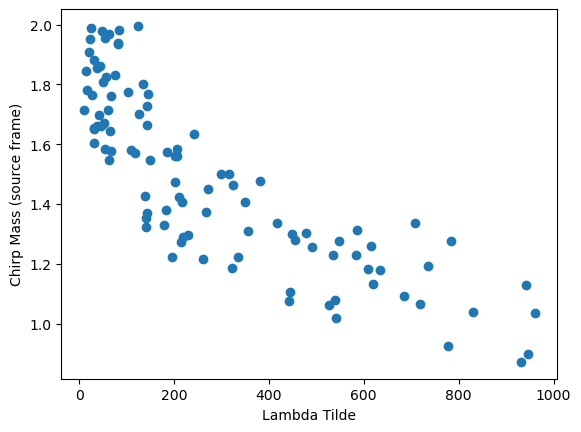

In [6]:
# Check that the prior is loaded by sampling from it
samples = priors_gw.sample(100)
# Plot the prior samples
plt.scatter(samples['lambda_tilde'], samples['chirp_mass_source'])
plt.xlabel('Lambda Tilde')
plt.ylabel('Chirp Mass (source frame)')

In [7]:


# Fix most of the priors to their injected values
for key in [
    "psi",
    "geocent_time",
    "ra",
    "dec",
    "chi_1",
    "chi_2",
    "theta_jn",
    #"luminosity_distance",
    "phase",
]:
    priors_gw[key] = injection_parameters[key]

print(priors_gw)

{'mass_1': Constraint(minimum=0.5, maximum=5, name='mass_1', latex_label='$m_1$', unit=None), 'mass_2': Constraint(minimum=0.5, maximum=5, name='mass_2', latex_label='$m_2$', unit=None), 'mass_ratio': DeltaFunction(peak=0.8666666666666667, name=None, latex_label=None, unit=None), 'luminosity_distance': DeltaFunction(peak=50.0, name=None, latex_label=None, unit=None), 'dec': -1.2108, 'ra': 1.375, 'theta_jn': 0.4, 'psi': 2.659, 'phase': 1.3, 'chirp_mass_source': Interped(xx=array([0.803015  , 0.80904515, 0.8150753 , 0.82110545, 0.82713561,
       0.83316576, 0.83919591, 0.84522606, 0.85125621, 0.85728636,
       0.86331652, 0.86934667, 0.87537682, 0.88140697, 0.88743712,
       0.89346727, 0.89949742, 0.90552758, 0.91155773, 0.91758788,
       0.92361803, 0.92964818, 0.93567833, 0.94170848, 0.94773864,
       0.95376879, 0.95979894, 0.96582909, 0.97185924, 0.97788939,
       0.98391955, 0.9899497 , 0.99597985, 1.00201   , 1.00804015,
       1.0140703 , 1.02010045, 1.02613061, 1.03216076,

In [8]:
# Set the duration and sampling frequency of the data segment that we're going
# to inject the signal into. For the
# TaylorF2 waveform, we cut the signal close to the isco frequency
duration = 32
minimum_frequency=400
sampling_frequency = 2048
start_time = injection_parameters["geocent_time"] + 2 - duration

# Fixed arguments passed into the source model. The analysis starts at 40 Hz.
waveform_arguments = dict(
    waveform_approximant="IMRPhenomPv2_NRTidal",
    reference_frequency=50.0,
    minimum_frequency=minimum_frequency,
)

In [9]:
# Create the waveform_generator using a LAL Binary Neutron Star source function
waveform_generator = bilby.gw.WaveformGenerator(
    duration=duration,
    sampling_frequency=sampling_frequency,
    frequency_domain_source_model=bilby.gw.source.lal_binary_neutron_star,
    #parameter_conversion=bilby.gw.conversion.convert_to_lal_binary_neutron_star_parameters,
    #parameter_conversion=BNSPriorDict_chirpmass_lambda_tilde.default_conversion_function,
    parameter_conversion=convert_to_lal_binary_neutron_star_parameters_mchirp,
    waveform_arguments=waveform_arguments,
)

15:42 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_neutron_star
  time_domain_source_model: None
  parameter_conversion: BNSPriorDict_ChirpMassLambda.convert_to_lal_binary_neutron_star_parameters_mchirp


In [10]:
# Set up interferometers.  In this case we'll use three interferometers
# (LIGO-Hanford (H1), LIGO-Livingston (L1), and Virgo (V1)).
# These default to their design sensitivity and start at 40 Hz.
interferometers = bilby.gw.detector.InterferometerList(["H1", "L1", "V1"])
for interferometer in interferometers:
    interferometer.minimum_frequency = 40
interferometers.set_strain_data_from_power_spectral_densities(
    sampling_frequency=sampling_frequency, duration=duration, start_time=start_time
)
interferometers.inject_signal(
    parameters=injection_parameters, waveform_generator=waveform_generator
)

15:42 bilby INFO    : Injected signal in H1:
15:42 bilby INFO    :   optimal SNR = 7.55
15:42 bilby INFO    :   matched filter SNR = 8.66+0.17j
15:42 bilby INFO    :   mass_1_source = 1.5
15:42 bilby INFO    :   mass_2_source = 1.3
15:42 bilby INFO    :   chi_1 = 0.02
15:42 bilby INFO    :   chi_2 = 0.02
15:42 bilby INFO    :   luminosity_distance = 50.0
15:42 bilby INFO    :   theta_jn = 0.4
15:42 bilby INFO    :   psi = 2.659
15:42 bilby INFO    :   phase = 1.3
15:42 bilby INFO    :   geocent_time = 1126259642.413
15:42 bilby INFO    :   ra = 1.375
15:42 bilby INFO    :   dec = -1.2108
15:42 bilby INFO    :   lambda_1 = 545
15:42 bilby INFO    :   lambda_2 = 1346
15:42 bilby INFO    : Injected signal in L1:
15:42 bilby INFO    :   optimal SNR = 6.11
15:42 bilby INFO    :   matched filter SNR = 5.47-0.22j
15:42 bilby INFO    :   mass_1_source = 1.5
15:42 bilby INFO    :   mass_2_source = 1.3
15:42 bilby INFO    :   chi_1 = 0.02
15:42 bilby INFO    :   chi_2 = 0.02
15:42 bilby INFO    

[{'plus': array([ 0.00000000e+00-0.00000000e+00j,  0.00000000e+00-0.00000000e+00j,
          0.00000000e+00-0.00000000e+00j, ...,
         -4.31724221e-25+4.05746121e-26j, -4.31716680e-25+4.04645075e-26j,
          0.00000000e+00-0.00000000e+00j]),
  'cross': array([0.00000000e+00+0.00000000e+00j, 0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j, ...,
         4.04378226e-26+4.30268746e-25j, 4.03280892e-26+4.30261231e-25j,
         0.00000000e+00+0.00000000e+00j])},
 {'plus': array([ 0.00000000e+00-0.00000000e+00j,  0.00000000e+00-0.00000000e+00j,
          0.00000000e+00-0.00000000e+00j, ...,
         -4.31724221e-25+4.05746121e-26j, -4.31716680e-25+4.04645075e-26j,
          0.00000000e+00-0.00000000e+00j]),
  'cross': array([0.00000000e+00+0.00000000e+00j, 0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j, ...,
         4.04378226e-26+4.30268746e-25j, 4.03280892e-26+4.30261231e-25j,
         0.00000000e+00+0.00000000e+00j])},
 {'plus': ar

In [11]:
# Initialise the likelihood by passing in the interferometer data (IFOs)
# and the waveform generator
likelihood = bilby.gw.GravitationalWaveTransient(
    interferometers=interferometers,
    waveform_generator=waveform_generator,
)

In [14]:
# WHY DOES THIS WORK!!!!!!
priors_gw = dict(priors_gw)


#nsteps = 2000
#burnin = nsteps // 3

# Run sampler.  In this case we're going to use the `nestle` sampler
# This will be very slow depending on your chosen signal 
result = bilby.run_sampler(
    likelihood=likelihood,
    priors=priors_gw,
    sampler="nestle",
    nlive=1000,
    injection_parameters=injection_parameters,
    outdir=outdir,
    label=label,
    npool=1,
)


15:50 bilby INFO    : Running for label 'bns_example', output will be saved to 'outdir'
15:50 bilby INFO    : Using lal version 7.3.1
15:50 bilby INFO    : Using lal git version Branch: None;Tag: lalsuite-v7.19;Id: 84d780c102cf51ea1fdf7a1cbf0a626a5eca0d0a;;Builder: Duncan Macleod <duncan.macleod@ligo.org>;Repository status: CLEAN: All modifications committed
15:50 bilby INFO    : Using lalsimulation version 5.2.1
15:50 bilby INFO    : Using lalsimulation git version Branch: None;Tag: lalsuite-v7.19;Id: 84d780c102cf51ea1fdf7a1cbf0a626a5eca0d0a;;Builder: Duncan Macleod <duncan.macleod@ligo.org>;Repository status: CLEAN: All modifications committed
15:51 bilby INFO    : Analysis priors:
15:51 bilby INFO    : chirp_mass_source=Interped(xx=array([0.803015  , 0.80904515, 0.8150753 , 0.82110545, 0.82713561,
       0.83316576, 0.83919591, 0.84522606, 0.85125621, 0.85728636,
       0.86331652, 0.86934667, 0.87537682, 0.88140697, 0.88743712,
       0.89346727, 0.89949742, 0.90552758, 0.91155773,

it=  9782 logz=51.61608765


16:00 bilby INFO    : Sampling time: 0:09:00.257682
16:00 bilby ERROR   : 

Saving the data has failed with the following message:
Object of type method is not JSON serializable
Data has been dumped to outdir/bns_example_result.pkl.


16:00 bilby ERROR   : 

Saving the data has failed with the following message:
Object of type method is not JSON serializable
Data has been dumped to outdir/bns_example_result.pkl.


16:00 bilby INFO    : Summary of results:
nsamples: 10783
ln_noise_evidence: -94665.231
ln_evidence: -94613.196 +/-  0.088
ln_bayes_factor: 52.036 +/-  0.088



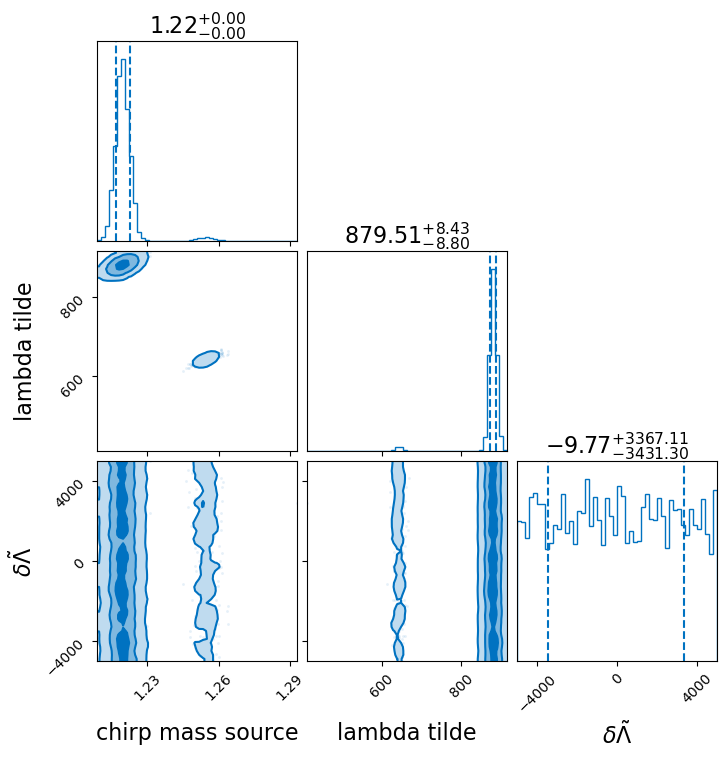

In [16]:
result.plot_corner()

In [ ]:
# Convert the posterior using bilby's standard conversion function
result.posterior = bilby.gw.conversion.generate_all_bns_parameters(result.posterior)
#priors = bilby.gw.prior.BNSPriorDict()

# Some hacky stuff bellow, for some reason bilby doesn't like to seralize this result file
# so I convert the priors back to uniform 
# This works fine in parallel bilby so I'm not sure what the issue is. 

# Overwrite custom priors with uniform to save the bilby object 
priors_gw['lambda_tilde'] = Uniform(name='lambda_tilde',minimum=0,maximum=1000)
priors_gw['chirp_mass_source'] = Uniform(name='chirp_mass_source',minimum=1.0,maximum=3.0)


In [ ]:
# Again, something that should be fixed at some point! 

# Create a new serializable result object
serializable_result = bilby.core.result.Result(
    label=label,
    outdir=outdir,
    sampler='nestle',
    search_parameter_keys=['chirp_mass_source', 'mass_ratio', 'lambda_tilde', 'delta_lambda_tilde'],
    fixed_parameter_keys=[],
    priors=priors_gw,
    posterior=result.posterior,
    log_evidence=result.log_evidence,
    log_evidence_err=result.log_evidence_err,
    log_noise_evidence=result.log_noise_evidence,
    log_bayes_factor=result.log_bayes_factor,
    log_likelihood_evaluations=result.log_likelihood_evaluations,
    log_prior_evaluations=result.log_prior_evaluations,
    sampling_time=result.sampling_time,
    meta_data=result.meta_data
)

# Save using standard bilby format
serializable_result.save_to_file()

In [ ]:
# Just in case save the posteriors to a dat too! 
result.save_posterior_samples()

In [ ]:
# Let's plot the prior on top of our result 
